In [115]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [116]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv(r"C:\Users\rishi\Desktop\SIH final\rice_dataset_20240907_194007.csv",skipinitialspace=True, usecols=fields)

In [117]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [118]:
df=df.set_index('Price_Date')

In [119]:
df.head(2)

,Modal_Price
Price_Date,
2010-04-06,320.551043
2010-04-13,294.349207


In [120]:
data = df.copy()
y = data

In [121]:
y

,Modal_Price
Price_Date,
2010-04-06,320.551043
2010-04-13,294.349207
2010-04-20,308.238286
2010-04-28,303.967079
2010-05-05,315.501080
...,...
2017-04-12,300.387425
2017-04-19,312.138019
2017-04-27,303.724723


In [122]:
# The 'MS' string groups the data in buckets by start of the month
y = y['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2010-04-01    306.776404
2010-05-01    310.109284
2010-06-01    313.090308
2010-07-01    321.909876
2010-08-01    317.120893
                 ...    
2017-01-01    292.803670
2017-02-01    303.852272
2017-03-01    298.022055
2017-04-01    304.445100
2017-05-01    299.090180
Freq: MS, Name: Modal_Price, Length: 86, dtype: float64


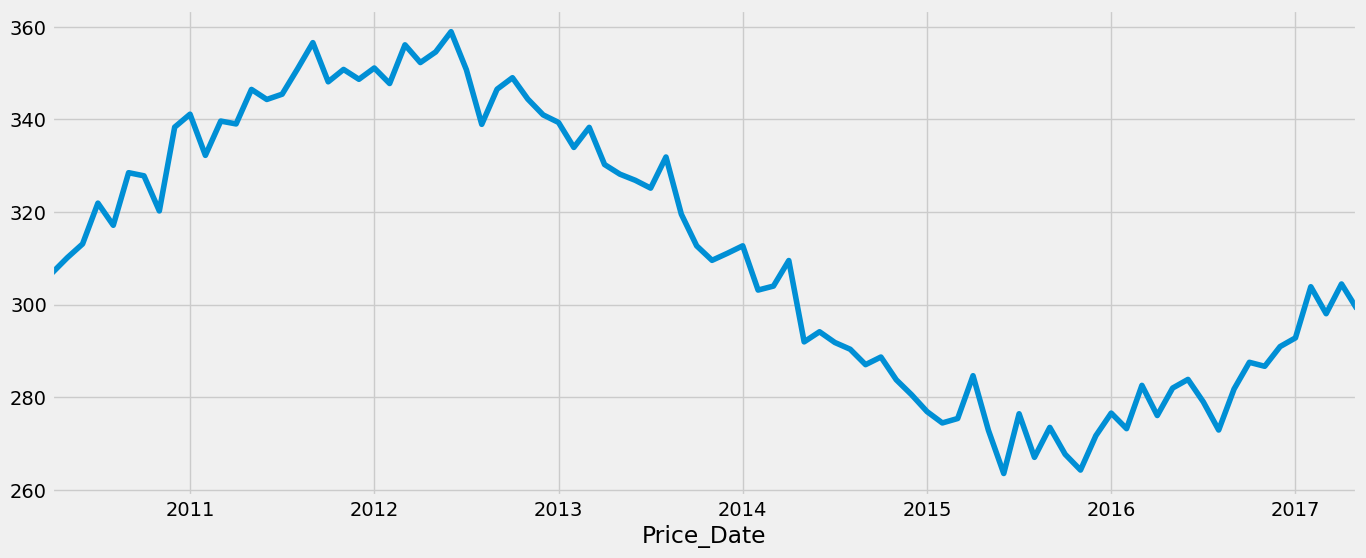

In [123]:
y.plot(figsize=(15, 6))
plt.show()

In [124]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [125]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1220.1093015934441
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:980.9159704209962
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:666.4650327508932
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:536.8947369240502
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:672.7871147354024
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:648.5057159556189
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:554.0332746439104
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:536.6391329852913
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1096.9445200780965
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:874.2865468217117
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:598.377832708
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:498.106666791082
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:615.5843112876136
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:597.0624229065312
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:515.6336986568472
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:499.7138554181311
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:556.7614481820167
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:471.9830602203526
ARIMA(0, 1, 0

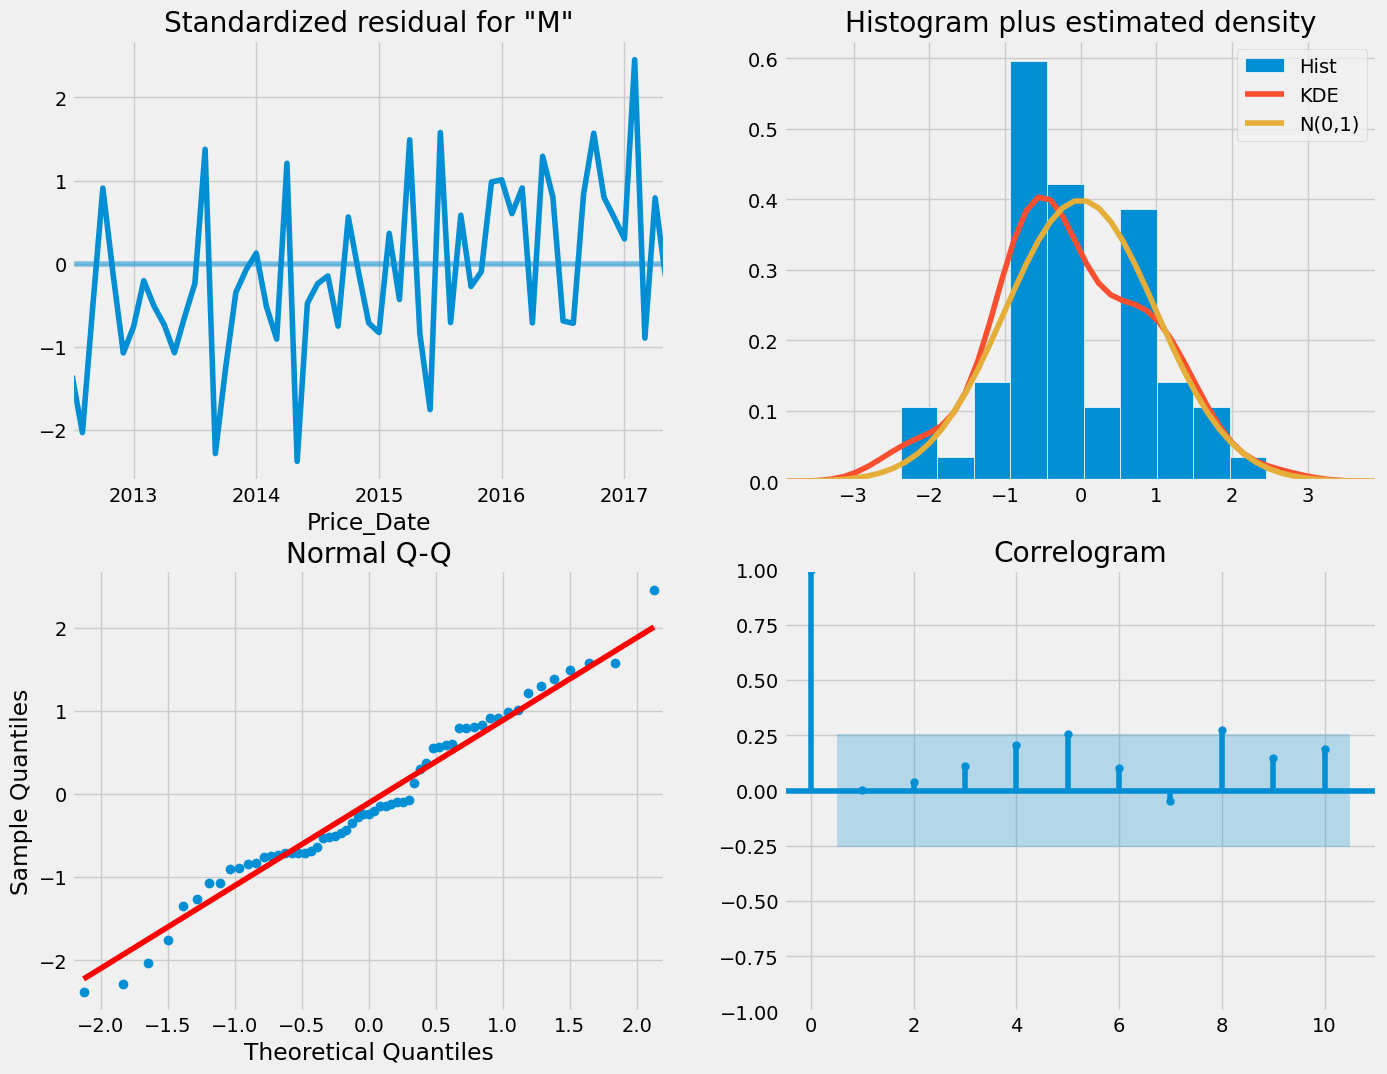

In [126]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


In [127]:
date_to_predict = input("enter date from which you want to  predict:")

In [128]:
pred = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=False)
pred_ci = pred.conf_int()

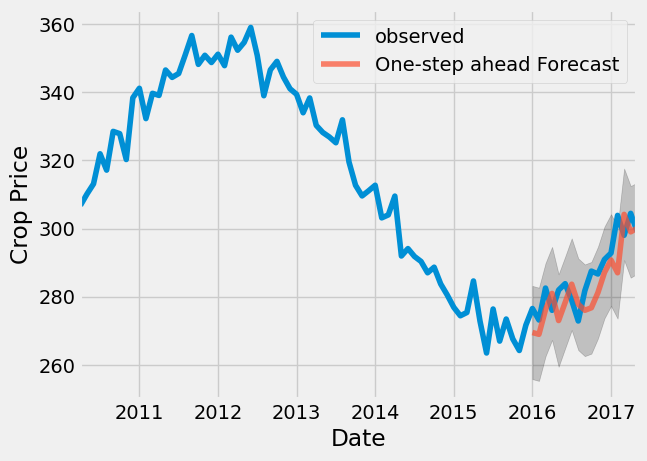

In [129]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [130]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 49.19


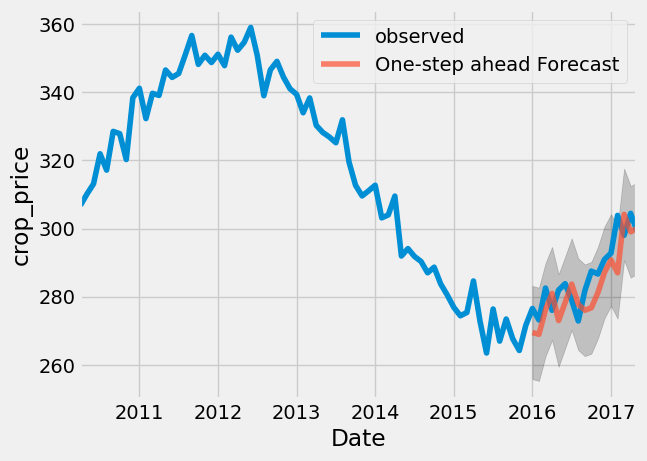

In [131]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [132]:
y_forecasted = pred.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 49.19


In [133]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(date_to_predict), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

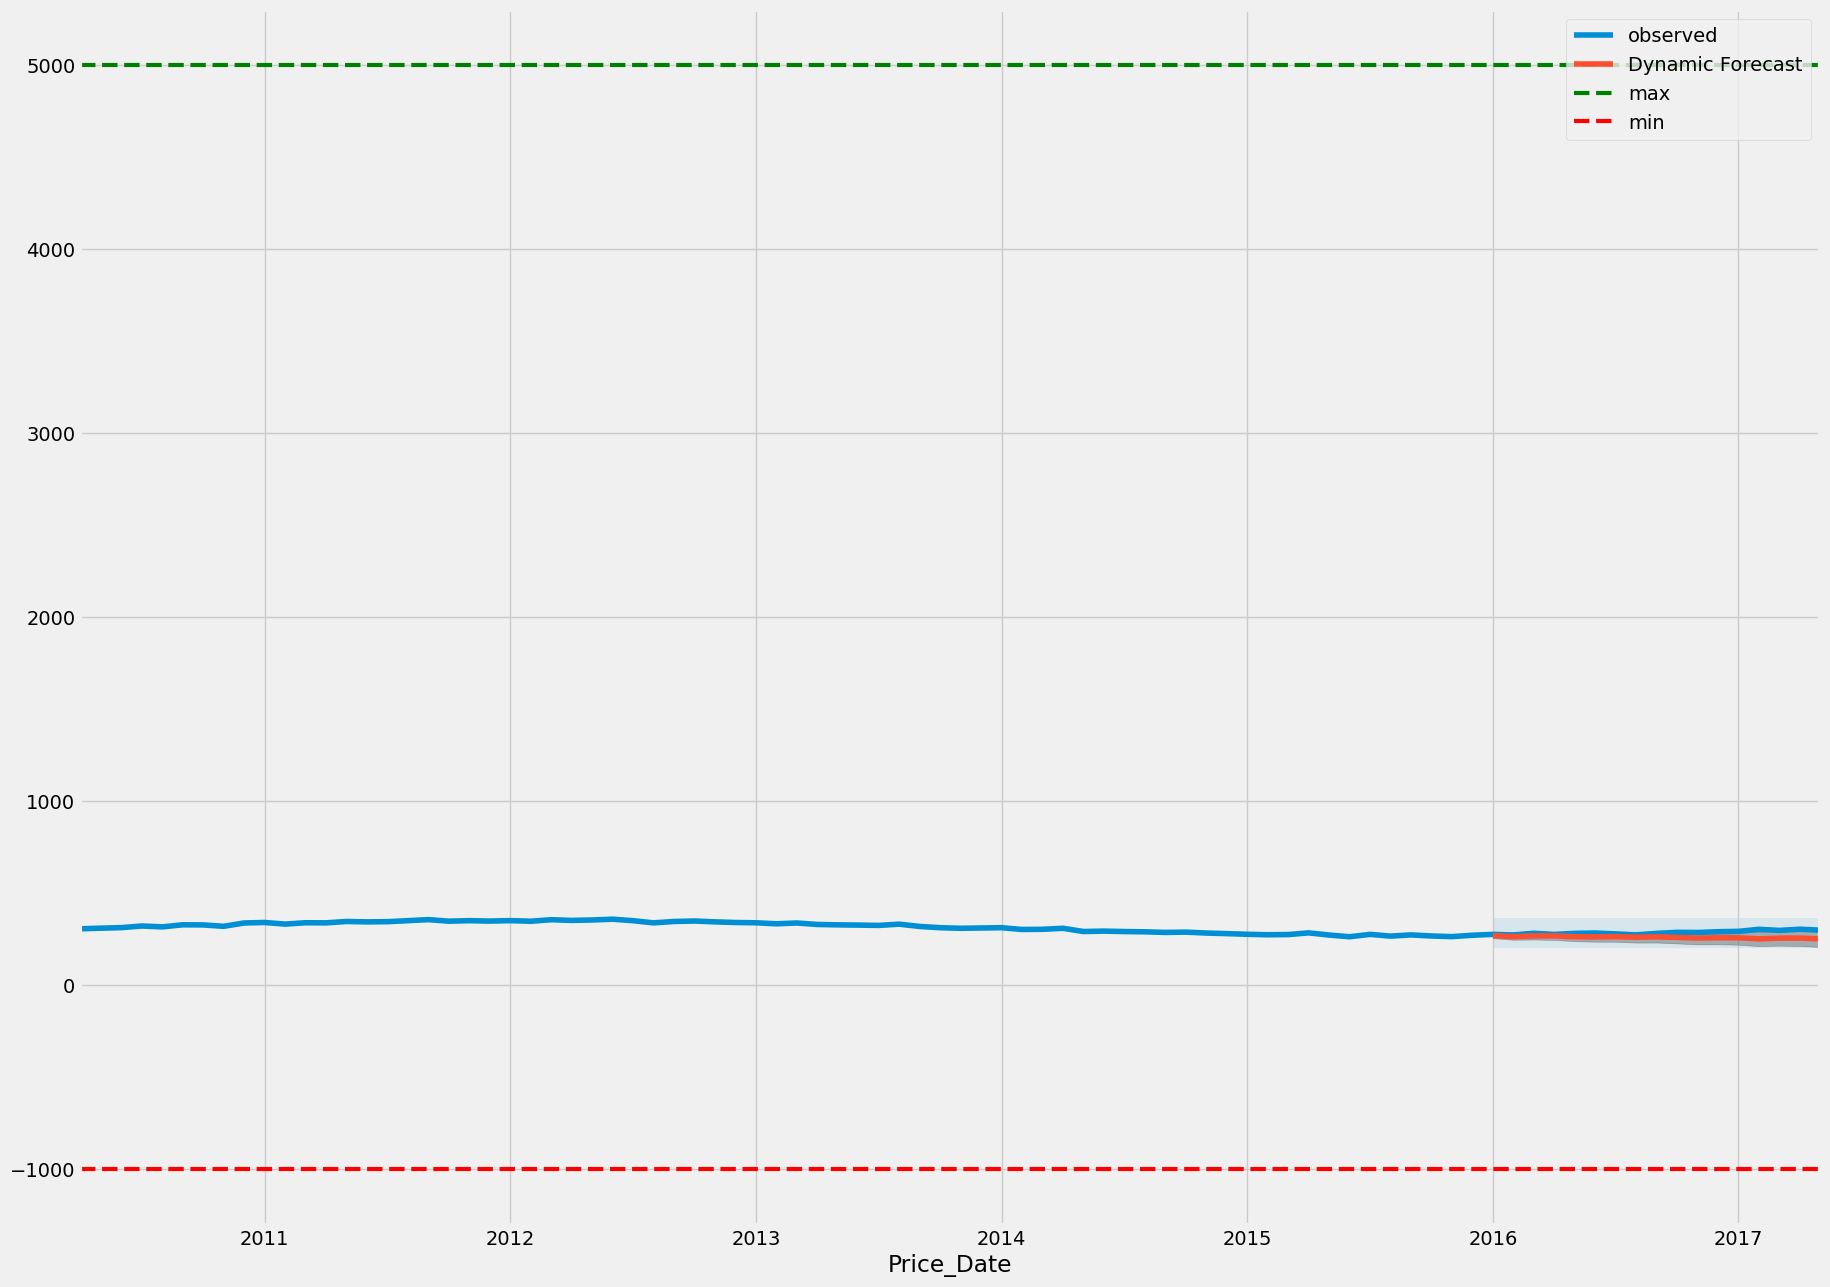

In [134]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(date_to_predict), y.index[-1],
                 alpha=.1, zorder=-1)

ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()

In [135]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[date_to_predict:]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 872.52


In [136]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [137]:
pred_ci

,lower Modal_Price,upper Modal_Price
2017-06-01,285.773764,312.330436
2017-07-01,282.866392,315.465428
2017-08-01,277.062406,315.038460
2017-09-01,277.661042,320.322092
2017-10-01,273.802973,320.684489
2017-11-01,268.927433,319.679557
2017-12-01,269.290812,323.638586
2018-01-01,268.593917,326.313789
2018-02-01,264.356767,325.262375
2018-03-01,266.167190,330.100303


In [138]:
# Get the lowest modal price from the lower Modal_Price column
lowest_modal_price = pred_ci['lower Modal_Price'].min()

# Get the highest modal price from the upper Modal_Price column
highest_modal_price = pred_ci['upper Modal_Price'].max()

# Print the results
print(f"Lowest Modal Price: {lowest_modal_price:.2f}")
print(f"Highest Modal Price: {highest_modal_price:.2f}")

Lowest Modal Price: 245.75
Highest Modal Price: 339.91


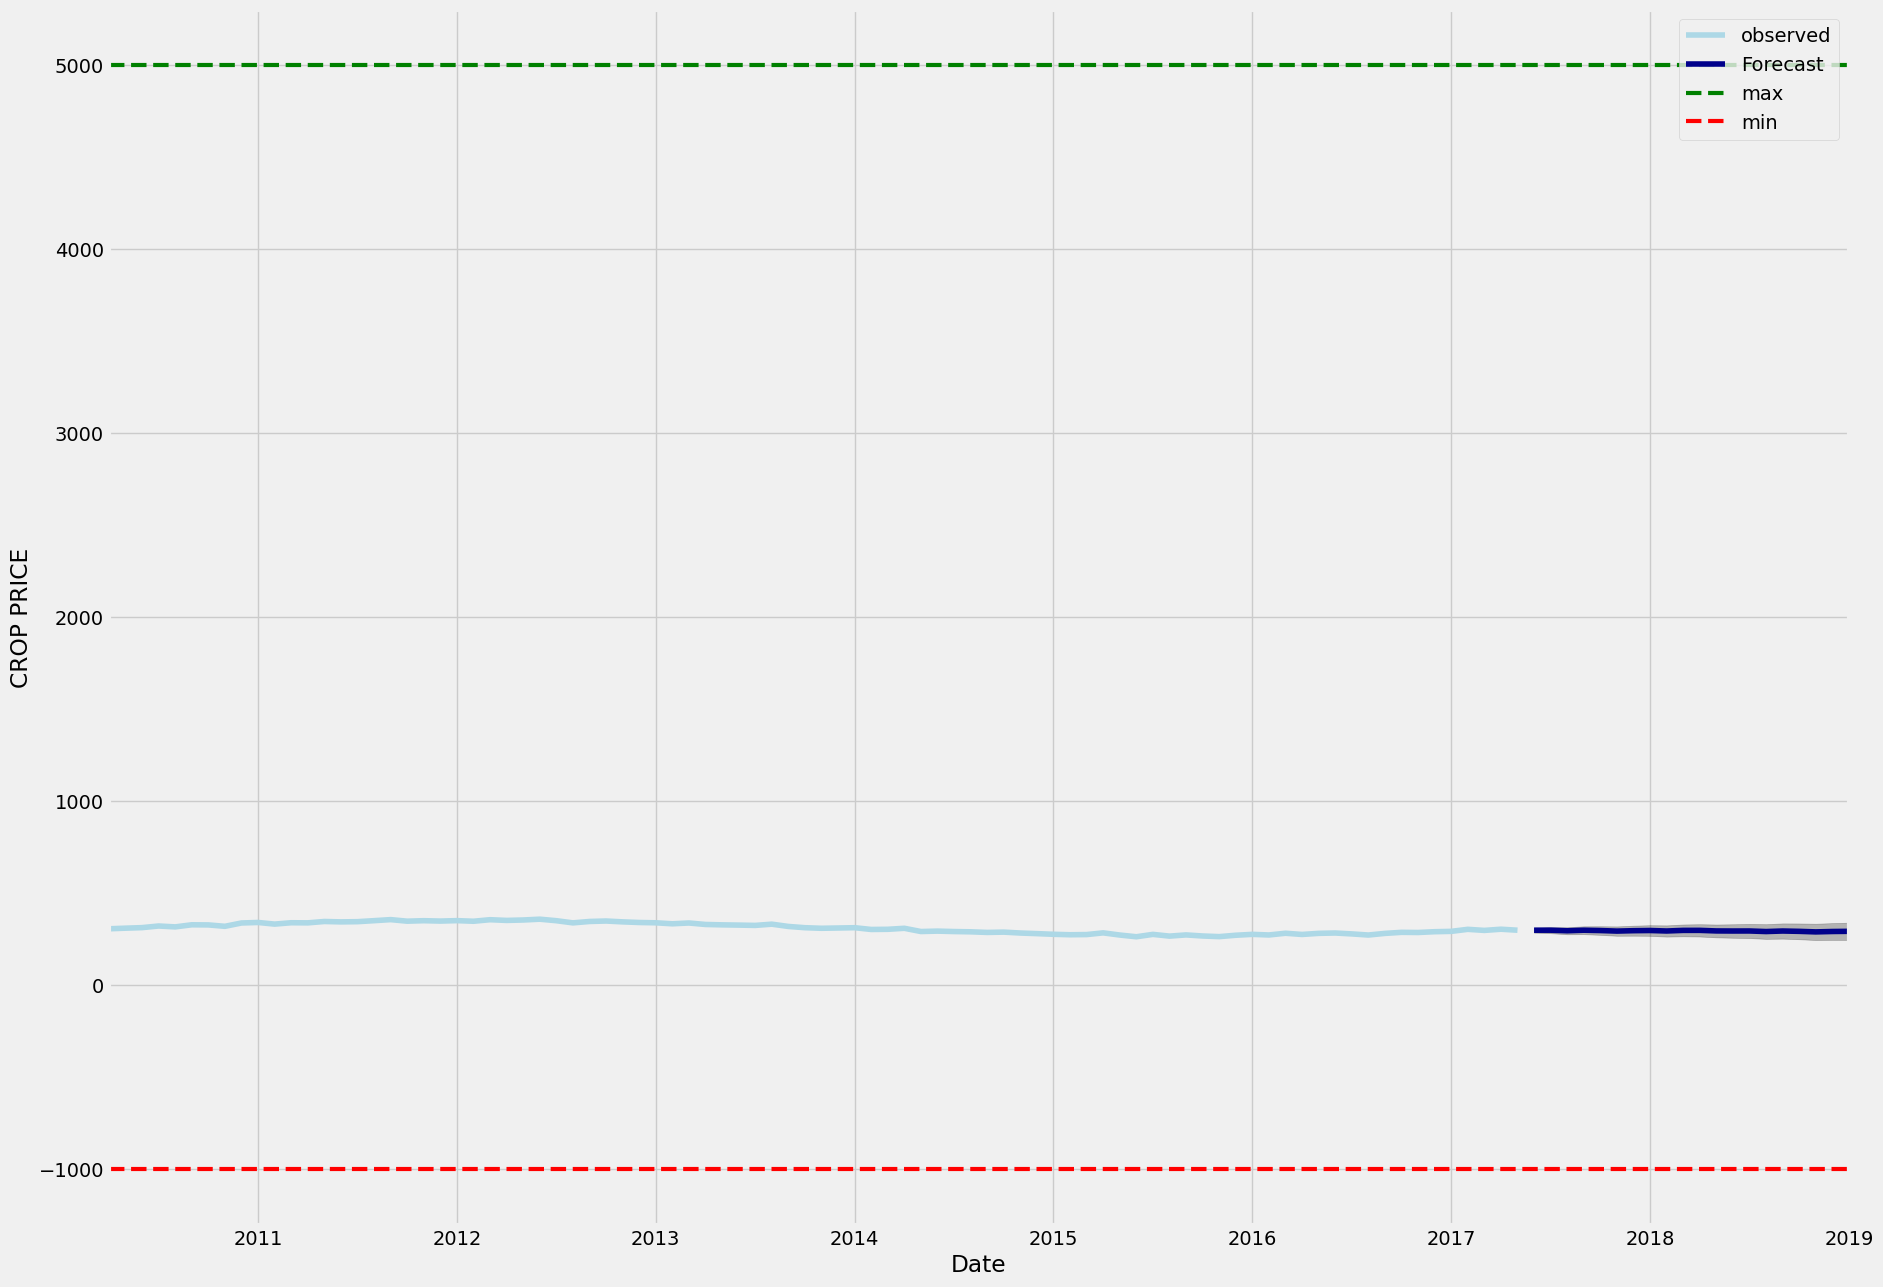

In [139]:
import matplotlib.pyplot as plt

# Your existing plot code
ax = y.plot(label='observed', figsize=(20, 15), color='lightblue')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='darkblue')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

# Add bold horizontal lines with labels
ax.hlines(y=5000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='green', linewidth=3, linestyles='--', label='max')
ax.hlines(y=-1000, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='red', linewidth=3, linestyles='--', label='min')

plt.legend()
plt.show()